In [ ]:
import pandas as pd
import numpy as np
import json
import re
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import backend as K
K.set_image_data_format('channels_last') 
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l1, l2

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

import h5py


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import json
with open('/content/drive/MyDrive/data//train.jsonl') as f:
    train_label_data = [json.loads(line) for line in f]

In [ ]:
with open('/content/drive/MyDrive/data/dev.jsonl') as f:
    dev_label_data = [json.loads(line) for line in f]

In [ ]:
df_text = pd.concat([pd.DataFrame(train_label_data), pd.DataFrame(dev_label_data)])  

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(text):
    text = re.sub('[^ a-zA-Z0-9]', '', text) 
    text = re.sub(r"\W"," ",text)
    text = re.sub(r"\d"," ",text)
    text = re.sub(r"\s+[a-z]\s+"," ",text)
    text = re.sub(r"\s+[a-z]$"," ",text)
    text = re.sub(r"^[a-z]\s+"," ",text)
    text = re.sub(r"\s+"," ",text) 
    return  text



nlp = spacy.blank('en')
def tokenizer(sent):    
    doc = nlp.tokenizer(sent)
    return [i.text for i in doc]

In [ ]:
df_text['preprocessed']  = df_text['text'].str.lower()
df_text['preprocessed']  = df_text['preprocessed'].apply(clean_text)
df_text['preprocessed'] = df_text['preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_text["preprocessed"] = df_text["preprocessed"].apply(tokenizer)
df_text['len']  = df_text['preprocessed'].str.len()

In [ ]:
print('Maximum Length of a sentence after cleaning: ', df_text['len'].max() )

Maximum Length of a sentence after cleaning:  45


In [ ]:
images = []
labels = []
text = []
for img in glob.glob("/content/drive/MyDrive/data/img/*.png")[:3000]:
    try:
      image_name_indf = 'img/' + img.split('/')[-1]
      print(image_name_indf)
      image_label = df_text.loc[df_text['img'] == image_name_indf, 'label'].values[0] 
      image_text = df_text.loc[df_text['img'] == image_name_indf, 'preprocessed'].values[0]
      # Read Image
      input_image= cv2.imread(img)
      input_image = cv2.resize(input_image, (512,512))
      
      images.append(input_image)
      labels.append(image_label)
      text.append(image_text)
    except:
    
      print('img/' + img.split('/')[-1])
      print('Fail')
      

img/89761.png
img/90243.png
img/90178.png
img/89745.png
img/90148.png
img/90214.png
img/89675.png
img/89740.png
img/89567.png
img/89615.png
img/90165.png
img/89750.png
img/89754.png
img/89754.png
Fail
img/89571.png
img/89571.png
Fail
img/89726.png
img/89613.png
img/90143.png
img/90143.png
Fail
img/90186.png
img/89642.png
img/89607.png
img/89607.png
Fail
img/89573.png
img/89617.png
img/89574.png
img/89743.png
img/90126.png
img/90146.png
img/90236.png
img/90516.png
img/90263.png
img/90481.png
img/90657.png
img/90657.png
Fail
img/90286.png
img/90718.png
img/90564.png
img/90342.png
img/90321.png
img/90417.png
img/90648.png
img/90251.png
img/90625.png
img/90267.png
img/90573.png
img/90582.png
img/90365.png
img/90315.png
img/90572.png
img/90583.png
img/90278.png
img/90386.png
img/90427.png
img/90587.png
img/90681.png
img/90574.png
img/90618.png
img/90413.png
img/90614.png
img/90351.png
img/90586.png
img/90586.png
Fail
img/90531.png
img/90285.png
img/90673.png
img/90612.png
img/90568.png
img/

In [ ]:
import gensim
model_word2vec = gensim.models.Word2Vec(text, size=5, window=3, workers=3, min_count = 1, sg =0)

In [ ]:
del model_word2vec

In [ ]:
text[0]

['short', 'history', 'us', 'presidents']

In [ ]:
model_word2vec.wv.most_similar("today")

[('members', 0.9953606128692627),
 ('hotel', 0.990466833114624),
 ('andddddd', 0.9805792570114136),
 ('scratches', 0.9774066805839539),
 ('glance', 0.976635217666626),
 ('store', 0.9722192287445068),
 ('spelled', 0.9720498323440552),
 ('ewoks', 0.9710290431976318),
 ('copied', 0.9708014130592346),
 ('juan', 0.9662927985191345)]

In [ ]:
model_word2vec.wv.most_similar("years")

[('omar', 0.9916448593139648),
 ('pssst', 0.984520673751831),
 ('scarlett', 0.9739982485771179),
 ('enemy', 0.9724782705307007),
 ('ghettos', 0.9639939665794373),
 ('get', 0.9625281095504761),
 ('streak', 0.961283266544342),
 ('first', 0.9573469161987305),
 ('see', 0.9554944038391113),
 ('trash', 0.9511104822158813)]

(<matplotlib.image.AxesImage at 0x7f3df9712250>,
 0,
 ['kids',
  'catch',
  'kitchen',
  'what',
  's',
  'mouth',
  'standing',
  'like',
  'nothing'])

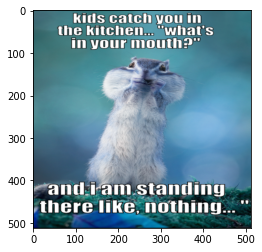

In [ ]:
plt.imshow(images[75]), labels[75], text[75]

In [ ]:
# img_data = np.array(images)
# img_data = img_data.astype('float32')
# img_data /= 255
# print (img_data.shape)

(2704, 512, 512, 3)


In [ ]:
# from sklearn import preprocessing
# img_data = np.array(images)
# #img_data = img_data.astype('float32')
# print (img_data.shape)
# #img_data_scaled = preprocessing.scale(img_data)
# #print (img_data_scaled.shape)

(6317, 512, 512, 3)


In [ ]:
len(images), len(labels), len(text)

(2704, 2704, 2704)

In [ ]:
y = pd.Series(labels)
y = pd.get_dummies(y)

In [ ]:
# Train_Image, Test_Image , Train_Text , Test_Text, Train_Label, Test_Label  = train_test_split(img_data, text, y, test_size = 0.25 , shuffle = True)
Train_Image, Test_Image , Train_Text , Test_Text, Train_Label, Test_Label  = train_test_split(images, text, y, test_size = 0.25 , shuffle = True)

In [ ]:
del images
del text
del labels
del input_image
del img_data

In [ ]:
Train_Image = np.array(Train_Image)

In [ ]:
Test_Image =  np.array(Test_Image)

In [ ]:
from collections import Counter
Counter(labels)

Counter({0: 1705, 1: 999})

In [ ]:
 len(Train_Label), len(Test_Label)

(2028, 676)

In [ ]:
print(Test_Label)

      0  1
597   0  1
1927  1  0
89    0  1
2482  0  1
1198  1  0
...  .. ..
348   1  0
465   0  1
217   0  1
2194  1  0
1141  0  1

[676 rows x 2 columns]


In [ ]:
Train_Label

,0,1
173,1,0
1404,0,1
1250,1,0
2268,0,1
902,1,0
...,...,...
505,1,0
326,0,1
958,1,0
2670,0,1


In [ ]:
Train_Image.shape, Test_Image.shape

((2028, 512, 512, 3), (676, 512, 512, 3))

In [ ]:
len(Train_Text), len(Test_Text)

(2028, 676)

In [ ]:
from collections import Counter
Counter(labels)

Counter({0: 1705, 1: 999})

In [ ]:
# del images
# del text
# del labels
# del input_image

In [ ]:
def CNN_Model(image_input_size):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape = image_input_size))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  model.add(Conv2D(256, (3, 3), activation='relu', padding = 'same'))

  model.add(Flatten())
  
  model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
  model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
  model.add(Dropout(0.2))

  model.add(Dense(2, activation='sigmoid'))
  return model

In [ ]:
image_input_size = (512,512,3)
cnn_model = CNN_Model(image_input_size)
learning_rate = 0.0001
opt = Adam(learning_rate = learning_rate) 
cnn_model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
class_weight={0: 25,
                1: 50.,}

In [ ]:
CNN = cnn_model.fit( Train_Image, np.array(Train_Label), epochs=30, validation_split=0.02 , class_weight=class_weight)

Epoch 1/30
63/63 [==============================] - 27s 384ms/step - loss: 8091.2469 - accuracy: 0.5005 - val_loss: 935.6262 - val_accuracy: 0.3902
Epoch 2/30
63/63 [==============================] - 23s 358ms/step - loss: 887.2834 - accuracy: 0.6465 - val_loss: 696.8504 - val_accuracy: 0.7561
Epoch 3/30
63/63 [==============================] - 23s 361ms/step - loss: 669.6498 - accuracy: 0.8201 - val_loss: 551.4520 - val_accuracy: 0.6829
Epoch 4/30
63/63 [==============================] - 23s 364ms/step - loss: 534.2389 - accuracy: 0.8980 - val_loss: 453.6322 - val_accuracy: 0.6098
Epoch 5/30
63/63 [==============================] - 23s 368ms/step - loss: 440.5565 - accuracy: 0.9176 - val_loss: 382.0946 - val_accuracy: 0.7073
Epoch 6/30
63/63 [==============================] - 23s 368ms/step - loss: 372.8240 - accuracy: 0.9467 - val_loss: 323.8318 - val_accuracy: 0.5854
Epoch 7/30
63/63 [==============================] - 23s 367ms/step - loss: 313.3161 - accuracy: 0.9636 - val_loss: 27

In [ ]:
# cnn_model.fit(Train_Image, np.array(Train_Label), batch_size = 32, epochs = 10, verbose=1 )

In [ ]:
#seralize model to json
model_json=cnn_model.to_json()
with open("improvedmodel_CNN.json","w") as json_file:
    json_file.write(model_json)
#seralize weights to HDFS
cnn_model.save_weights("improvedmodel_CNN.h5")
print("Saved Model To Disk")    

Saved Model To Disk


In [ ]:
#Load Json and Create Model
json_file=open("improvedmodel_CNN.json",'r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
#Load weights into new model
loaded_model.load_weights("improvedmodel_CNN.h5")
print("Loaded Model from disk")

loaded_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
prediction_cnn =  cnn_model.predict(Test_Image)

In [ ]:
from collections import Counter
Counter(Test_Label)

Counter({0: 1, 1: 1})

In [ ]:
prediction_cnn

array([[0.9713281 , 0.03469709],
       [0.9871106 , 0.1130346 ],
       [0.99933004, 0.00134843],
       ...,
       [0.9819795 , 0.01288421],
       [0.93936455, 0.05715566],
       [0.02827291, 0.99488896]], dtype=float32)

In [ ]:
prediction_cnn_copy =  prediction_cnn

In [ ]:
prediction_cnn_copy

array([[0.9713281 , 0.03469709],
       [0.9871106 , 0.1130346 ],
       [0.99933004, 0.00134843],
       ...,
       [0.9819795 , 0.01288421],
       [0.93936455, 0.05715566],
       [0.02827291, 0.99488896]], dtype=float32)

In [ ]:
for i in range(len(prediction_cnn_copy)):
  list_in = []
  
  # print(prediction_latefusion_copy[i], maximum)
  index = np.argmax(prediction_cnn_copy[i], axis =0)
  prediction_cnn_copy[i][index] = 1
  if index==1:
    prediction_cnn_copy[i][0] = 0
  else :
    prediction_cnn_copy[i][1] = 0

In [ ]:
prediction_cnn_copy

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# #Classification Report
# from sklearn.metrics import classification_report
# print(classification_report(model.predict(test_sentences).round(), test_tags))

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(prediction_cnn, Test_Label))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67       401
           1       0.49      0.43      0.46       275

   micro avg       0.59      0.59      0.59       676
   macro avg       0.56      0.56      0.56       676
weighted avg       0.58      0.59      0.58       676
 samples avg       0.59      0.59      0.59       676



In [ ]:
# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# confusion_matrix(test_tags, model.predict(test_sentences).round())


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction_cnn_copy.argmax(axis=1),Test_Label.values.argmax(axis=1))

array([[278, 123],
       [157, 118]])

In [ ]:
confusion_matrix(y_test, predictions)

confusion_matrix(
    y_test.values.argmax(axis=1), predictions.argmax(axis=1))

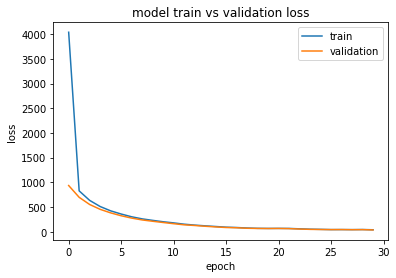

In [ ]:
#Training Loss Curve
import matplotlib.pyplot as plt
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

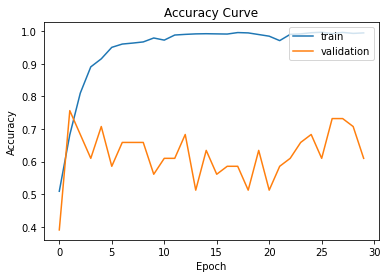

In [ ]:
#Accuracy Curve
import matplotlib.pyplot as plt
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.title('Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

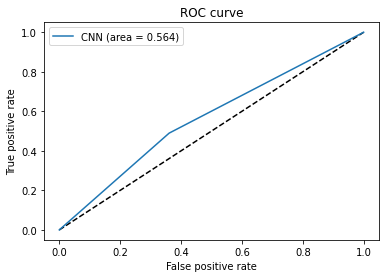

In [ ]:
#prediction_cnn_copy.argmax(axis=1)
#ROC Curve AUC
from sklearn.metrics import roc_curve
y_pred = prediction_cnn_copy.argmax(axis=1).ravel()
#fpr, tpr, thresholds = roc_curve(Test_Label), y_pred))
fpr, tpr, thresholds = roc_curve(Test_Label.values.argmax(axis=1), y_pred)

from sklearn.metrics import auc
auc = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='CNN (area = {:.3f})'.format(auc))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()